# **분류 성능 평가**

분류 문제에는 다양한 성능 평가 기준이 있다.

## **Scikit-Learn에서 지원하는 분류 성능 평가 명령**



*   sklearn.metrics 서브 패키지

 *  confusion_matrix()
 *  classfication_report()
 *   accuracy_score(y_true,y_pred)
 *   precision_score(y_ture,y_pred)
 *   recall_score(y_ture,y_pred)
 *   fbeta_score(y_ture,y_pred)
 *   f1_score(y_ture,y_pred)

## **분류 결과표 (Confusion Matrix)**
분류 결과표는 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수로 센 결과이다.

원래 클래스는 행(row)으로 예측한 클래스는 열(column)로 나타낸다.

| | 예측 클래스 0 | 예측 클래스 1 | 예측 클래스 2 | 
|-|-|-|-|
| 원 클래스 0 | <small>원 클래스가 0, 예측 클래스가 0인 표본의 수</small> | <small>원 클래스가 0, 예측 클래스가 1인 표본의 수</small> | <small>원 클래스가 0, 예측 클래스가 2인 표본의 수</small> |
| 원 클래스 1 | <small>원 클래스가 1, 예측 클래스가 0인 표본의 수</small> | <small>원 클래스가 1, 예측 클래스가 1인 표본의 수</small> | <small>원 클래스가 1, 예측 클래스가 2인 표본의 수</small> |
| 원 클래스 2 | <small>원 클래스가 2, 예측 클래스가 0인 표본의 수</small> | <small>원 클래스가 2, 예측 클래스가 1인 표본의 수</small> | <small>원 클래스가 2, 예측 클래스가 2인 표본의 수</small> |

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
y_true=[2,0,2,2,0,1]
y_pred=[0,0,2,2,0,2]
confusion_matrix(y_true,y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [25]:
y_ture=["cat","ant","cat","cat","ant","bird"]
y_pred=["ant","ant","cat","cat","ant","cat"]
confusion_matrix(y_ture,y_pred,labels=["ant","bird","cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

## **이진 분류 결과표(Bianry Confusion Matrix)**

클래스가 0과1 두 종류 밖에 없는 경우에는 일반적으로 클래스 이름을 "Positive"와 "Negative"로 표시한다.

또, 분류 모형의 예측 결과가 맞는 경우, 즉 Positive를 Negative라고 예측하거나 Negative를 Positive라고 예측한 경우에는 "False"라고 한다.

이 경우 이진 분류 결과의 명칭과 결과표는 다음과 같다.

| | Positive라고 예측  | Negative라고 예측 | 
|-|-|-|
| 실제 Positive | True Positive   |  False Negative |             
| 실제 Negative | False Positive  |  True Negative  |   

### **FDS(Fraud Detection System)의 예**

FBS(Fraud Detection System)는 금융 거래, 회계 장부 등에서 잘못된 거래, 사기 거래를 찾아내는 시스템을 말한다. FDS의 예측 결과가 Positive이면 사기 거래라고 예측한 것이고 Negative이면 정상거래라고 예측한 것이다. 이 결과가 사실과 일치하는지 틀리는지에 따라 다음과 같이 말한다.

* True Positive: 사기를 사기라고 정확하게 예측
* True Negative: 정상을 정상이라고 정확하게 예측
* False Positive: 정상을 사기라고 잘못 예측
* False Negative: 사기를 정상이라고 잘못 예측

|                     | 사기 거래라고 예측                | 정상 거래라고 예측                         | 
| --------------------| ------------------------ | --------------------------------- |
| 실제로 사기 거래  | True Positive            |  False Negative                   |             
| 실제로 정상 거래  | False Positive            |  True Negative                    |   

## **평가 스코어**

**Accuracy 정확도**


*   전체 샘플 중 출력한 샘플 수의 비율

$$\text{accuracy} = \dfrac{TP + TN}{TP + TN + FP + FN}$$


**Precision 정밀도**


*   클래스에 속한다고 출력한 샘플 중 실제로 클래스에 속하는 샘풀 수의 비율
*   FDS의 경우, 사기 거래라고 판단한 거래 중 실제 사기 거래의 비율. (유죄율)

$$\text{precision} = \dfrac{TP}{TP + FP}$$

**Recall 재현율**


*   TPR: true positive rate

*   실제 클래스에 속한 샘풀 중에 클래스에 속한다고 출력한 샘플의 수
*   FDS의 경우, 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율.(검거율)


*   sensitivy(민감도)

$$\text{recall} = \dfrac{TP}{TP + FN}$$

**Fall-Out**



*   FDR: false positive rate
*   실제 클래스에 속하지 않는 샘플 중에 클래스에 속한다고 출력한 샘플 수

*   FDS의 경우, 실제 정상 거래 중에서 FDS가 사기 거래라고 예측한 거래의 비율, 원죄(寃罪)율

$$\text{fallout} = \dfrac{FP}{FP + TN}$$

**F(beta)score**


*   정밀도(Precision)과 재현율(Recall)의 가중 조화 평균

$$
F_\beta = (1 + \beta^2) \, ({\text{precision} \times \text{recall}}) \, / \, ({\beta^2 \, \text{precision} + \text{recall}})
$$

*   F1 Score
 * beta = 1 

$$
F_1 = 2 \cdot \text{precision} \cdot \text{recall} \, / \, (\text{precision} + \text{recall})
$$



In [26]:
from sklearn.metrics import classification_report

In [27]:
y_true=[0,1,2,2,2]
y_pred=[0,0,2,2,1]
target_names=['class 0','class 1','class 2']
print(classification_report(y_true,y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [28]:
y_true=["cat","ant","cat","cat","ant","bird","bird"]
y_pred=["ant","ant","cat","cat","ant","cat","bird"]
print(classification_report(y_true,y_pred,target_names=["ant","bird","cat"]))

              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
        bird       1.00      0.50      0.67         2
         cat       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.78      0.72      0.71         7
weighted avg       0.76      0.71      0.70         7



## **ROC 커브**

ROC(Receiver Operator Characteristic) 커브는 클래스 판별 기준값의 변화에 따른 Fall-out과 Recall의 변화를 시각화한 것이다.

모든 이진 분류 모형은 판별 평면으로부터의 거리에 해당하는 판별 함수(discriminant function)를 가지며 판별 함수 값이 음수이면 0인 클래스, 양수이면 1인 클래스에 해당한다고 판별한다. 즉 0이 클래스 판별 기준 값이 된다. ROC 커브는 이 클래스 판별 기준값이 달라진다면 판별 결과가 어떻게 달라지는지는 표현한 것이다.

Scikit_Learn의 Classification 클래스는 판별 함수 값을 계산하는 decision_function메서드를 제공한다. ROC커브는 이 판별 함수 값을 이용하여 다음과 같이 작성한다

1.   모든 표본 데이터에 대해 판별 함수 값을 계산한다

2.   계산된 판별 함수 값을 정렬한다
3.   만약 0이 아닌 가장 작은 판별 함수값을 클래스 구분 기준값으로 하면 모든 표본은 클래스1 (Positive)이 된다. 이때 Fall-out과 Recall을 계산하면 Recall과 Fall-out모두 1이 된다.


4.   두번째로 작은 판별 함수값을 클래스 구분 기준값으로 하면 판별 함수 값이 가장 작은 표본 1개를 제외하고 나머지 표본은 클래스 1(Positive)이 된다. 마찬가지로 이 때의 Fall-Out과 Recall을 계산하여 기록한다.

5.   가장 큰 판별 함수값이 클래스 구분 기준값이 될 때까지 이를 반복한다. 이때는 모든 표본이 클래스 0(Negative)으로 판별되며 Recall과 Fall-Out이 모두 0이 된다.

일반적으로 클래스 판별 기준이 변화함에 따라 Recall과 Fall-out은 같이 증가하거나 감소한다. Recall이 크고 Fall-Out이 작은 모형은 좋은 모형으로 생각할 수 있다.

In [29]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
X,y=make_classification(n_features=1,n_redundant=0,n_informative=1,n_clusters_per_class=1,random_state=4)
model=LogisticRegression().fit(X,y)

In [30]:
print(confusion_matrix(y,model.predict(X)))

[[47  2]
 [ 3 48]]


In [31]:
print(classification_report(y,model.predict(X)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        49
           1       0.96      0.94      0.95        51

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [32]:
model.decision_function(X)

array([-1.50873098,  5.38863206, -3.74555942,  5.20397562, -0.44095236,
       -2.68832614,  0.39588876, -2.24177989,  3.09285594, -0.96039456,
       -1.72591438,  3.30217847, -2.90277186, -5.15623439,  2.06657756,
       -3.75085818,  3.14673688,  3.11450701,  4.38988471,  3.63334932,
       -4.5121414 , -0.22205161,  3.38902893, -3.40013681,  1.92519307,
        4.3751403 ,  5.02012274,  1.19469882,  2.12923217,  0.57749536,
        3.44599095, -0.1130571 ,  3.98154721, -6.32091195, -3.22646947,
       -2.69415488, -4.49254026, -2.27000333, -2.70081945,  4.51903626,
        1.484836  ,  2.7385926 , -2.17658465, -1.57095449, -4.81953539,
       -2.69800271,  1.99345325, -4.25040829, -1.0335926 , -1.51069995,
        3.33794971,  2.39186633,  3.5446986 , -4.26985824,  4.62803209,
       -3.18617518, -1.86899397,  3.76646401,  2.73219391, -2.27000801,
       -4.43499946,  0.37348483,  3.09562222,  3.53905422,  3.35372556,
       -1.56256047,  1.15740625, -2.52953145,  6.48611003,  3.06

In [33]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y,model.decision_function(X))

In [34]:
%matplotlib inline
from matplotlib import pyplot as plt

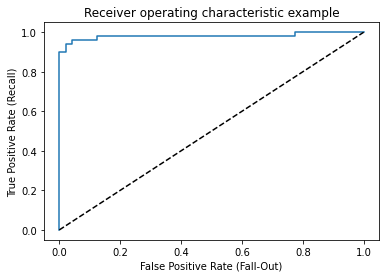

In [37]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--',label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

## **Multi-Class 예제**

In [38]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris=load_iris()
model=LogisticRegression().fit(iris.data,iris.target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [39]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
from sklearn.metrics import roc_curve
fpr0,tpr0,thresholds0=roc_curve(iris.target,model.decision_function(iris.data)[:,0],pos_label=0)
fpr1,tpr1,thresholds1=roc_curve(iris.target,model.decision_function(iris.data)[:,1],pos_label=1)
fpr2,tpr2,thresholds2=roc_curve(iris.target,model.decision_function(iris.data)[:,2],pos_label=2)

In [41]:
fpr0,tpr0,thresholds0

(array([0.  , 0.  , 0.  , 0.6 , 0.62, 1.  ]),
 array([0.  , 0.02, 1.  , 1.  , 1.  , 1.  ]),
 array([  9.65743478,   8.65743478,   6.06798187,  -4.8126766 ,
         -4.89462443, -10.75848535]))

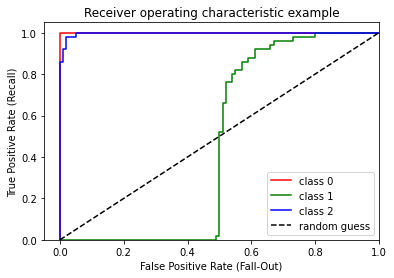

In [43]:
plt.plot(fpr0,tpr0,"r-",label="class 0")
plt.plot(fpr1,tpr1,"g-",label="class 1")
plt.plot(fpr2,tpr2,"b-",label="class 2")
plt.plot([0,1],[0,1],'k--',label="random guess")
plt.xlim(-0.05,1.0)
plt.ylim(0,1.05)
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [45]:
print(confusion_matrix(iris.target,model.predict(iris.data)))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [46]:
print(classification_report(iris.target,model.predict(iris.data)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [47]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
from sklearn.preprocessing import label_binarize
yb0=label_binarize(iris.target,classes=[0,1,2])
yb1=label_binarize(model.predict(iris.data),classes=[0,1,2])

50 50


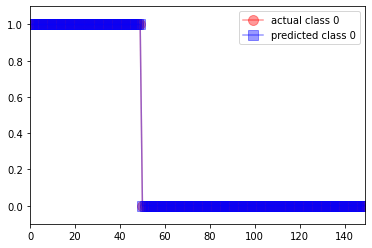

In [50]:
print(yb0[:, 0].sum(), yb1[:, 0].sum())
plt.plot(yb0[:, 0], 'ro-', markersize=10, alpha=0.4, label="actual class 0")
plt.plot(yb1[:, 0], 'bs-', markersize=10, alpha=0.4, label="predicted class 0")
plt.legend()
plt.xlim(0, len(iris.target)-1);
plt.ylim(-0.1, 1.1);

50 48


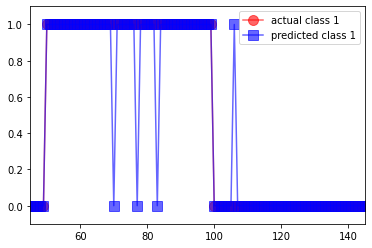

In [51]:
print(yb0[:, 1].sum(), yb1[:, 1].sum())
plt.plot(yb0[:, 1], 'ro-', markersize=10, alpha=0.6, label="actual class 1")
plt.plot(yb1[:, 1], 'bs-', markersize=10, alpha=0.6, label="predicted class 1")
plt.legend()
plt.xlim(45, 145);
plt.ylim(-0.1, 1.1);

## **AUC(Area Under the Curve)**
AUC는 ROC curve의 면적을 뜻한다. Fall-Out 대비 Recall 값이 클 수록 AUC가 1에 가까운 값이며 우수한 모형이다

In [52]:
from sklearn.metrics import auc
auc(fpr0,tpr0),auc(fpr1,tpr1),auc(fpr2,tpr2)

(1.0, 0.46799999999999997, 0.9972)